In [6]:
import pandas as pd

In [43]:
datos = pd.read_csv("eod_2017_csv/tviaje_eod2017/conjunto_de_datos/tviaje.csv")
catalogo_lugar = pd.read_csv("eod_2017_csv/tviaje_eod2017/catalogos/dto_origen.csv")
distrito_metro = pd.read_csv("Distrito-Metro.csv")
proporciones = pd.read_csv("proporciones.csv")
diccionario = pd.read_csv("dictionary.csv")

In [44]:
datos

,id_via,id_soc,p5_3,n_via,p5_6,p5_7_6,p5_7_7,dto_origen,p5_9_1,p5_9_2,...,p5_27_6,p5_27_7,p5_27_8,estrato,factor,upm_dis,est_dis,tloc,sexo,edad
0,2936,1268,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
1,2937,1268,1,2,3,16,9,16,14,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
2,2938,1268,2,1,1,15,9,2,17,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
3,2939,1268,2,2,7,15,9,2,23,0,...,NaN,NaN,NaN,3,244,87,40,1,2,26
4,2940,1269,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,244,87,40,1,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531589,530057,199596,1,2,3,12,9,64,13,0,...,NaN,NaN,NaN,2,68,12313,5460,2,1,26
531590,530058,199597,2,1,1,69,13,300,7,0,...,NaN,NaN,NaN,2,68,12313,5460,2,1,51
531591,530059,199597,2,2,4,81,15,166,15,0,...,NaN,NaN,NaN,2,68,12313,5460,2,1,51
531592,530060,199598,2,1,1,69,13,300,14,0,...,NaN,NaN,NaN,2,68,12313,5460,2,2,49


In [45]:
diccionario

,Nombre,Nuevo
0,Acatitla,Acatitla
1,Aculco,Aculco
2,AgrÌcola Oriental,Agrícola Oriental
3,Allende,Allende
4,Apatlaco,Apatlaco
...,...,...
158,Xola,Xola
159,Zapata,Zapata
160,Zapotitl·n,Zapotitlán
161,Zaragoza,Zaragoza


In [46]:
name_mapping = dict(zip(diccionario['Nombre'], diccionario['Nuevo']))

proporciones.replace(name_mapping, inplace=True)

In [114]:
proporciones

,p,q,l,i,j,pi
0,Acatitla,Aculco,8,Chabacano,La Viga,1.0
1,Acatitla,Aculco,8,La Viga,Santa Anita,1.0
2,Acatitla,Aculco,8,Santa Anita,Coyuya,1.0
3,Acatitla,Aculco,8,Coyuya,Iztacalco,1.0
4,Acatitla,Aculco,8,Iztacalco,Apatlaco,1.0
...,...,...,...,...,...,...
322034,Zócalo,Zaragoza,1,San Lázaro,Moctezuma,1.0
322035,Zócalo,Zaragoza,1,Candelaria,San Lázaro,1.0
322036,Zócalo,Zaragoza,1,Merced,Candelaria,1.0
322037,Zócalo,Zaragoza,1,Pino Suárez,Merced,1.0


In [48]:
matrix = pd.pivot_table(proporciones, values='pi', index=['p', 'q'], columns=['l', 'i', 'j'], aggfunc='sum')
matrix = matrix.fillna(0)


In [113]:
matrix

p                                               Acatitla                    \
q                                                 Aculco Agrícola Oriental   
l i                      j                                                   
1 Balbuena               Boulevard Puerto Aéreo      0.0               0.0   
                         Moctezuma                   0.0               0.0   
  Balderas               Cuauhtémoc                  0.0               0.0   
                         Salto del Agua              0.0               0.0   
  Boulevard Puerto Aéreo Balbuena                    0.0               0.0   
...                                                  ...               ...   
B San Lázaro             Ricardo Flores Magón        0.0               0.0   
  Tepito                 Lagunilla                   0.0               0.0   
                         Morelos                     0.0               0.0   
  Villa de Aragón        Bosque de Aragón            0.0               0.0   
                         Nezahualcóyotl              0.0               0.0   

p                                                                 \
q                                               Allende Apatlaco   
l i                      j                                         
1 Balbuena               Boulevard Puerto Aéreo    0.00      0.0   
                         Moctezuma                 0.55      0.0   
  Balderas               Cuauhtémoc                0.00      0.0   
                         Salto del Agua            0.00      0.0   
  Boulevard Puerto Aéreo Balbuena                  0.55      0.0   
...                                                 ...      ...   
B San Lázaro             Ricardo Flores Magón      0.00      0.0   
  Tepito                 Lagunilla                 0.00      0.0   
                         Morelos                   0.00      0.0   
  Villa de Aragón        Bosque de Aragón          0.00      0.0   
                         Nezahualcóyotl            0.00      0.0   

p                                                                      \
q                                               Aquiles Serdán Aragón   
l i                      j                                              
1 Balbuena               Boulevard Puerto Aéreo            0.0    0.0   
                         Moctezuma                         0.0    0.0   
  Balderas               Cuauhtémoc                        0.0    0.0   
                         Salto del Agua                    0.0    0.0   
  Boulevard Puerto Aéreo Balbuena                          0.0    0.0   
...                                                        ...    ...   
B San Lázaro             Ricardo Flores Magón              0.0    0.0   
  Tepito                 Lagunilla                         0.0    0.0   
                         Morelos                           0.0    0.0   
  Villa de Aragón        Bosque de Aragón                  0.0    0.0   
                         Nezahualcóyotl                    0.0    0.0   

p                                                                    \
q                                               Atlalilco Auditorio   
l i                      j                                            
1 Balbuena               Boulevard Puerto Aéreo       0.0       0.0   
                         Moctezuma                    0.0       0.0   
  Balderas               Cuauhtémoc                   0.0       0.0   
                         Salto del Agua               0.0       0.0   
  Boulevard Puerto Aéreo Balbuena                     0.0       0.0   
...                                                   ...       ...   
B San Lázaro             Ricardo Flores Magón         0.0       0.0   
  Tepito                 Lagunilla                    0.0       0.0   
                         Morelos                      0.0       0.0   
  Villa de Aragón        Bosque de Aragón             0.0       0.0   
        

# seleccionamos solo los datos del Metro
datos_metro =datos[datos["p5_14_01"]==1]

In [51]:
#solo las personas de la ciudad de México o del EDOMEX
datos_metro = datos_metro[(datos_metro["p5_12_7"] == 9)]
datos_metro["p5_12_7"]

10        9
11        9
62        9
64        9
69        9
         ..
530876    9
530966    9
531158    9
531161    9
531164    9
Name: p5_12_7, Length: 24634, dtype: int64

In [52]:
datos_metro = datos_metro[(datos_metro["p5_9_1"]>5) & (datos_metro["p5_9_1"]<12)]

In [53]:
datos_metro

,id_via,id_soc,p5_3,n_via,p5_6,p5_7_6,p5_7_7,dto_origen,p5_9_1,p5_9_2,...,p5_27_6,p5_27_7,p5_27_8,estrato,factor,upm_dis,est_dis,tloc,sexo,edad
10,2946,1270,1,3,1,15,9,2,8,0,...,NaN,NaN,NaN,3,236,88,40,1,1,64
11,2947,1270,1,4,6,5,9,25,10,0,...,NaN,NaN,NaN,3,236,88,40,1,1,64
62,2998,1285,1,1,1,15,9,2,8,0,...,2.0,2.0,2.0,3,39,89,40,1,1,54
64,3000,1286,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,39,89,40,1,2,52
69,3005,1288,1,1,1,15,9,2,8,0,...,NaN,NaN,NaN,3,39,89,40,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530876,531464,200083,1,1,1,69,13,300,8,20,...,2.0,2.0,2.0,2,57,12350,5470,3,2,36
530966,531554,200105,2,1,1,69,13,300,11,31,...,NaN,NaN,NaN,2,57,12351,5470,3,2,56
531158,529626,199458,2,1,1,69,13,300,8,0,...,NaN,NaN,NaN,2,125,12306,5460,2,1,33
531161,529629,199459,2,1,1,69,13,300,8,0,...,NaN,NaN,NaN,2,125,12306,5460,2,2,36


In [54]:
datos_metro["dto_origen"]

10          2
11         25
62          2
64          2
69          2
         ... 
530876    300
530966    300
531158    300
531161    300
531164    300
Name: dto_origen, Length: 24634, dtype: int64

In [55]:
catalogo_lugar

,cve,descrip
0,1,Centro Histórico
1,2,Buenavista-Reforma
2,3,Tlatelolco
3,4,Morelos
4,5,Moctezuma
...,...,...
295,207,Tramo Amecameca-Cuautla
296,207,Tramo Amecameca-Cuautla
297,300,Tizayuca
298,888,Fuera de la ZMVM


In [56]:
merged_df = pd.merge(datos_metro, catalogo_lugar, left_on='dto_origen', right_on='cve', how='left')
merged_df['origen'] = merged_df['descrip'].where(~merged_df['descrip'].isna(), other='No match found')

merged_df2 = pd.merge(datos_metro, catalogo_lugar, left_on='dto_dest', right_on='cve', how='left')
merged_df['destino'] = merged_df2['descrip'].where(~merged_df['descrip'].isna(), other='No match found')


In [57]:
merged_df[["origen",'destino']]


,origen,destino
0,Buenavista-Reforma,Nueva Industrial Vallejo
1,Nueva Industrial Vallejo,Buenavista-Reforma
2,Buenavista-Reforma,Morelos
3,Buenavista-Reforma,Tlatelolco
4,Buenavista-Reforma,Tlatelolco
...,...,...
36433,Tizayuca,NaN
36434,Tizayuca,NaN
36435,Tizayuca,NaN
36436,Tizayuca,NaN


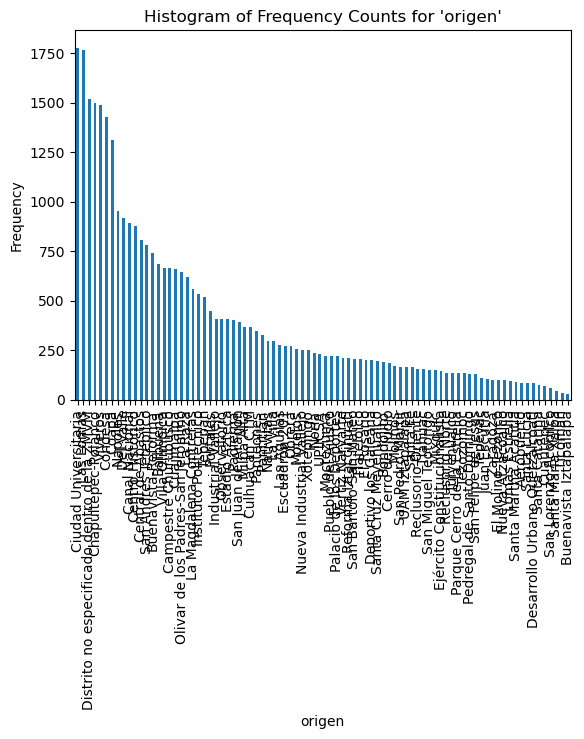

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
# Calculate frequency counts
frequency_counts = merged_df["destino"].value_counts()

# Plot histogram of frequencies with category names on the x-axis
frequency_counts.plot(kind='bar', title="Histogram of Frequency Counts for 'origen'", xlabel="origen", ylabel="Frequency")
plt.show()

In [59]:
# Calculate the number of different types of values in the "origen" column
num_unique_origen = merged_df['destino'].nunique()
print("Number of different types of values in 'origen':", num_unique_origen)


Number of different types of values in 'origen': 86


In [60]:
# Fusionar los datos de origen
datos_estaciones = pd.merge(merged_df, distrito_metro, left_on='origen', right_on='Distrito', how='left')
datos_estaciones["metro_origen"] = datos_estaciones["Metro"].copy()
datos_estaciones.drop(columns=["Metro", "Distrito"], inplace=True)

# Fusionar los datos de destino
datos_estaciones = pd.merge(datos_estaciones, distrito_metro, left_on='destino', right_on='Distrito', how='left')
datos_estaciones["metro_destino"] = datos_estaciones["Metro"].copy()
datos_estaciones.drop(columns=["Metro", "Distrito"], inplace=True)


In [61]:
datos_estaciones["metro_origen"]

0         Revolución
1            Vallejo
2         Revolución
3         Revolución
4         Revolución
             ...    
110251     Lagunilla
110252     Lagunilla
110253     Lagunilla
110254     Lagunilla
110255     Lagunilla
Name: metro_origen, Length: 110256, dtype: object

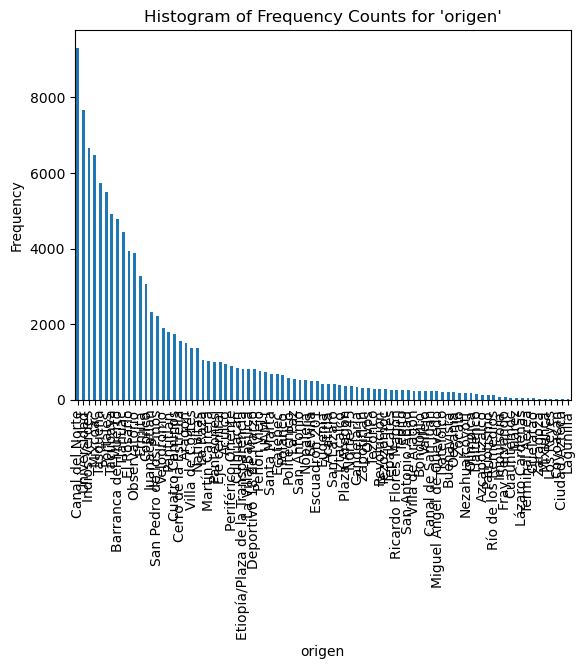

In [62]:
frequency_counts = datos_estaciones["metro_origen"].value_counts()

# Plot histogram of frequencies with category names on the x-axis
frequency_counts.plot(kind='bar', title="Histogram of Frequency Counts for 'origen'", xlabel="origen", ylabel="Frequency")
plt.show()

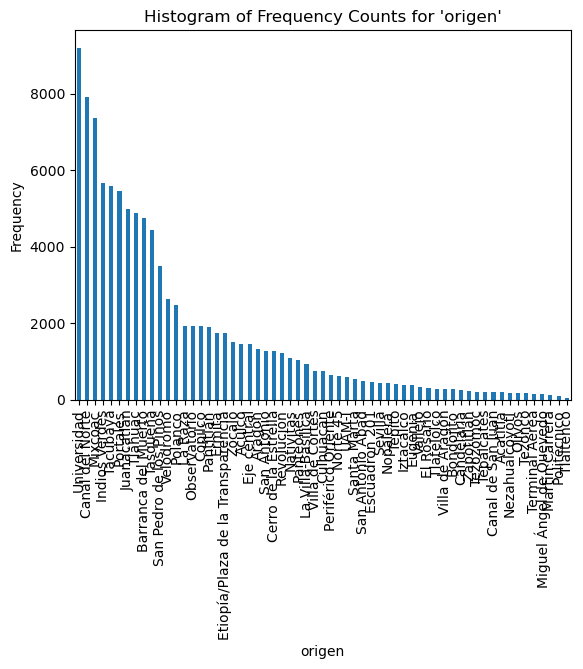

In [63]:
frequency_counts = datos_estaciones["metro_destino"].value_counts()

# Plot histogram of frequencies with category names on the x-axis
frequency_counts.plot(kind='bar', title="Histogram of Frequency Counts for 'origen'", xlabel="origen", ylabel="Frequency")
plt.show()

In [64]:
matriz_origen_destino = pd.crosstab(datos_estaciones['metro_origen'], datos_estaciones['metro_destino'])

# Si deseas añadir los totales por fila y columna, puedes hacer lo siguiente:
matriz_origen_destino['Total por origen'] = matriz_origen_destino.sum(axis=1)
matriz_origen_destino.loc['Total por destino'] = matriz_origen_destino.sum()

# Visualizar la matriz
matriz_origen_destino

metro_destino,Acatitla,Aculco,Aragón,Barranca del Muerto,Bondojito,Canal de San Juan,Canal del Norte,Candelaria,Cerro de la Estrella,Copilco,...,Tláhuac,UAM-I,Universidad,Vallejo,Velódromo,Villa de Aragón,Villa de Cortés,Zapotitlán,Zócalo,Total por origen
metro_origen,,,,,,,,,,,,,,,,,,,,,
Acatitla,0,34,0,4,0,1,0,0,0,4,...,34,15,4,1,15,1,0,0,5,344
Aculco,2,144,8,24,4,2,32,1,1,5,...,32,10,23,0,31,0,4,3,21,931
Aragón,9,12,346,34,32,2,48,4,0,2,...,29,1,86,7,25,42,0,0,28,1416
Azcapotzalco,0,4,0,0,3,0,0,0,0,2,...,3,0,2,6,15,0,4,0,4,122
Barranca del Muerto,6,29,4,674,7,2,156,49,48,114,...,181,3,720,19,68,0,0,2,65,4719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villa de Aragón,0,0,8,3,8,0,8,1,2,0,...,2,0,16,1,2,17,0,0,12,229
Villa de Cortés,0,44,8,22,0,0,0,4,0,22,...,44,10,48,0,128,0,160,0,2,1346
Zapotitlán,1,9,0,2,0,1,40,4,0,1,...,11,16,9,0,1,1,8,5,7,263


In [65]:


matrix = pd.pivot_table(proporciones, values='pi', columns=['p', 'q'], index=['l', 'i', 'j'], aggfunc='sum')

# Fill NaN values with 0
matrix = matrix.fillna(0)



In [66]:
matrix

p                                               Acatitla                    \
q                                                 Aculco Agrícola Oriental   
l i                      j                                                   
1 Balbuena               Boulevard Puerto Aéreo      0.0               0.0   
                         Moctezuma                   0.0               0.0   
  Balderas               Cuauhtémoc                  0.0               0.0   
                         Salto del Agua              0.0               0.0   
  Boulevard Puerto Aéreo Balbuena                    0.0               0.0   
...                                                  ...               ...   
B San Lázaro             Ricardo Flores Magón        0.0               0.0   
  Tepito                 Lagunilla                   0.0               0.0   
                         Morelos                     0.0               0.0   
  Villa de Aragón        Bosque de Aragón            0.0               0.0   
                         Nezahualcóyotl              0.0               0.0   

p                                                                 \
q                                               Allende Apatlaco   
l i                      j                                         
1 Balbuena               Boulevard Puerto Aéreo    0.00      0.0   
                         Moctezuma                 0.55      0.0   
  Balderas               Cuauhtémoc                0.00      0.0   
                         Salto del Agua            0.00      0.0   
  Boulevard Puerto Aéreo Balbuena                  0.55      0.0   
...                                                 ...      ...   
B San Lázaro             Ricardo Flores Magón      0.00      0.0   
  Tepito                 Lagunilla                 0.00      0.0   
                         Morelos                   0.00      0.0   
  Villa de Aragón        Bosque de Aragón          0.00      0.0   
                         Nezahualcóyotl            0.00      0.0   

p                                                                      \
q                                               Aquiles Serdán Aragón   
l i                      j                                              
1 Balbuena               Boulevard Puerto Aéreo            0.0    0.0   
                         Moctezuma                         0.0    0.0   
  Balderas               Cuauhtémoc                        0.0    0.0   
                         Salto del Agua                    0.0    0.0   
  Boulevard Puerto Aéreo Balbuena                          0.0    0.0   
...                                                        ...    ...   
B San Lázaro             Ricardo Flores Magón              0.0    0.0   
  Tepito                 Lagunilla                         0.0    0.0   
                         Morelos                           0.0    0.0   
  Villa de Aragón        Bosque de Aragón                  0.0    0.0   
                         Nezahualcóyotl                    0.0    0.0   

p                                                                    \
q                                               Atlalilco Auditorio   
l i                      j                                            
1 Balbuena               Boulevard Puerto Aéreo       0.0       0.0   
                         Moctezuma                    0.0       0.0   
  Balderas               Cuauhtémoc                   0.0       0.0   
                         Salto del Agua               0.0       0.0   
  Boulevard Puerto Aéreo Balbuena                     0.0       0.0   
...                                                   ...       ...   
B San Lázaro             Ricardo Flores Magón         0.0       0.0   
  Tepito                 Lagunilla                    0.0       0.0   
                         Morelos                      0.0       0.0   
  Villa de Aragón        Bosque de Aragón             0.0       0.0   
        

In [97]:
for a in diccionario["Nuevo"]:
    if a not in matriz_origen_destino.columns:
        matriz_origen_destino[a] = None  # Agrega la columna con valores nulos si no existe


/var/folders/44/j1prnxq16f5bhqsd3b7mms3m0000gn/T/ipykernel_58521/1564516861.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matriz_origen_destino[a] = None  # Agrega la columna con valores nulos si no existe
/var/folders/44/j1prnxq16f5bhqsd3b7mms3m0000gn/T/ipykernel_58521/1564516861.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matriz_origen_destino[a] = None  # Agrega la columna con valores nulos si no existe
/var/folders/44/j1prnxq16f5bhqsd3b7mms3m0000gn/T/ipykernel_58521/1564516861.py:3: PerformanceWarning: DataFram

In [98]:
for a in diccionario["Nuevo"]:
    if a not in matriz_origen_destino.index:
        matriz_origen_destino.loc[a] = None  # Agrega una nueva fila con el índice 'a' y valores nulos


In [99]:
matriz_origen_destino.fillna(0, inplace=True)
matriz_origen_destino

metro_destino,Acatitla,Aculco,Aragón,Barranca del Muerto,Bondojito,Canal de San Juan,Canal del Norte,Candelaria,Cerro de la Estrella,Copilco,...,San Joaquín,San Juan de Letrán,Santa Anita,Tacuba,Talismán,Valle Gómez,Viaducto,Viveros/Derechos Humanos,Xola,Zapata
metro_origen,,,,,,,,,,,,,,,,,,,,,
Acatitla,0.0,34.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
Aculco,2.0,144.0,8.0,24.0,4.0,2.0,32.0,1.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
Aragón,9.0,12.0,346.0,34.0,32.0,2.0,48.0,4.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
Azcapotzalco,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
Barranca del Muerto,6.0,29.0,4.0,674.0,7.0,2.0,156.0,49.0,48.0,114.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valle Gómez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Viaducto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Viveros/Derechos Humanos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Obtener el orden deseado de los índices y columnas a partir de diccionario["nuevo"]
orden_filas = diccionario["Nuevo"]
orden_columnas = diccionario["Nuevo"]

# Reordenar la matriz matriz_origen_destino según este orden
matriz_origen_destino = matriz_origen_destino.reindex(index=orden_filas, columns=orden_columnas)


In [102]:
matriz_origen_destino

Nuevo,Acatitla,Aculco,Agrícola Oriental,Allende,Apatlaco,Aquiles Serdán,Aragón,Atlalilco,Auditorio,Autobuses del Norte,...,Velódromo,Viaducto,Villa de Aragón,Villa de Cortés,Viveros/Derechos Humanos,Xola,Zapata,Zapotitlán,Zaragoza,Zócalo
Nuevo,,,,,,,,,,,,,,,,,,,,,
Acatitla,0.0,34.0,0,0,0,0,0.0,0,0,0,...,15.0,0,1.0,0.0,0,0,0,0.0,0.0,5.0
Aculco,2.0,144.0,0,0,0,0,8.0,0,0,0,...,31.0,0,0.0,4.0,0,0,0,3.0,0.0,21.0
Agrícola Oriental,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
Allende,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
Apatlaco,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xola,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
Zapata,0.0,0.0,0,0,0,0,0.0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
Zapotitlán,1.0,9.0,0,0,0,0,0.0,0,0,0,...,1.0,0,1.0,8.0,0,0,0,5.0,0.0,7.0


In [103]:
vector = matriz_origen_destino.values.ravel()

# Verificar la forma del vector resultante
print("Forma del vector resultante:", vector.shape)

# Si deseas convertir el vector en un DataFrame de una columna
vector_dataframe = pd.DataFrame(vector)

# Verificar la forma del DataFrame de una columna
print("Forma del DataFrame de una columna:", vector_dataframe.shape)

Forma del vector resultante: (26569,)
Forma del DataFrame de una columna: (26569, 1)


In [104]:
vector_dataframe

,0
0,0.0
1,34.0
2,0.0
3,0.0
4,0.0
...,...
26564,0.0
26565,0.0
26566,0.0
26567,0.0


In [115]:
import pandas as pd
import numpy as np
filas, columnas = matriz_origen_destino.shape
matriz_sin_diagonal = matriz_origen_destino.copy()
for i in range(min(filas, columnas)):
    matriz_sin_diagonal.iloc[i, i] = np.nan
vector = matriz_sin_diagonal.values.ravel()
vector_sin_diagonal = vector[~np.isnan(vector)]
vector_dataframe = pd.DataFrame(vector_sin_diagonal)
print("Forma del DataFrame de una columna sin diagonal:", vector_dataframe.shape)


Forma del DataFrame de una columna sin diagonal: (26406, 1)


In [118]:

matrix_array = matrix.to_numpy()
vector_array = vector_dataframe.to_numpy()
matrix_array
vector_array

array([[34.],
       [ 0.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]])

In [119]:
vector_array_reshaped = vector_array.reshape(-1, 1)
result_array = np.dot(matrix_array, vector_array_reshaped)
result_dataframe = pd.DataFrame(result_array, columns=['Result'])
print(result_dataframe)

      Result
0     356.00
1     682.19
2    4715.12
3    1928.24
4     682.19
..       ...
359   418.42
360   840.71
361   554.00
362  1079.00
363   323.00

[364 rows x 1 columns]
